В этом задании вам нужно воспользоваться опытом предыдущих недель, чтобы побить бейзлайн в соревновании по сентимент-анализу отзывов на товары на Kaggle Inclass:

https://www.kaggle.com/c/simplesentiment


В качестве метрики качества используется accuracy.

In [1]:
import pandas as pd

In [2]:
dtrain = pd.read_csv('products_sentiment_train.tsv',sep = '\t', header=None, names= ['text' ,'label'])
dtest = pd.read_csv('products_sentiment_test.tsv',sep = '\t')

In [3]:
dtest.head()

,Id,text
0,0,"so , why the small digital elph , rather than ..."
1,1,3/4 way through the first disk we played on it...
2,2,better for the zen micro is outlook compatibil...
3,3,6 . play gameboy color games on it with goboy .
4,4,"likewise , i 've heard norton 2004 professiona..."


In [4]:
dtrain.head()

,text,label
0,"2 . take around 10,000 640x480 pictures .",1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music files are uns...,0
4,i was using the cheapie pail ... and it worked...,1


In [5]:
dtrain.text[0]

'2 . take around 10,000 640x480 pictures .'

In [6]:
dtrain.groupby('label')['label'].count()/dtrain.shape[0]

label
0    0.363
1    0.637
Name: label, dtype: float64

**Загрузим nltk / string - далее пройдемся по каждому тексту . уберем  знаки пунктации, лематизируем текст**

In [8]:
import nltk
from nltk.corpus import stopwords 
import string
from string import punctuation

In [10]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\unikum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\unikum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
def delete_punctuation(line):
    translation_table = str.maketrans('', '', string.punctuation)
    return line.translate(translation_table).lower()

In [13]:
def format_str(line):
    word_list = nltk.word_tokenize(line)
    words = [lemmatizer.lemmatize(word) for word in word_list]
    words = [word.strip() for word in delete_punctuation(line).split()]
    return ' '.join(words)

In [14]:
for i, line in enumerate(dtrain.text):
    dtrain.text[i] = format_str(line)

C:\Users\unikum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
dtrain.text[:5]

0                 2 take around 10000 640x480 pictures
1    i downloaded a trial version of computer assoc...
2    the wrt54g plus the hga7t is a perfect solutio...
3    i dont especially like how music files are uns...
4    i was using the cheapie pail and it worked ok ...
Name: text, dtype: object

**Импортируем необходимую библотиек соберем pipeline из CountVectorizer/TfidfVectorizer и разных классикаторов , и с помощью cross_val_score  оценим получаемое "из коробки" качество по accuracy. Далее выберим лучший классификатор и подберем параметры по нему**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import ensemble,metrics, tree 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [17]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(dtrain['text'])

In [18]:
X.shape

(2000, 4076)

In [19]:
z=[]
k=0
for i in [LogisticRegression(),  SGDClassifier(), ensemble.RandomForestClassifier(), LinearSVC() ]:
    z.append ((cross_val_score(i,X,dtrain.label, scoring = 'accuracy' , cv=5).mean()))
    print (i , z[k])
    k+=1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 0.7729999999999999
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 0.7510000000000001
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,

In [20]:
Tfidf = TfidfVectorizer ()

X_tfidf = Tfidf.fit_transform(dtrain['text'])

In [21]:
z=[]
k=0
for i in [LogisticRegression(),  SGDClassifier(), ensemble.RandomForestClassifier(), LinearSVC()]:
    z.append ((cross_val_score(i,X_tfidf,dtrain.label, scoring = 'accuracy' , cv=5).mean()))
    print (i , z[k])
    k+=1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 0.7665
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 0.7540000000000001
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
           

**выбререм лог рег и частоты слов (CountVectorizer)**

In [22]:
pipeline = Pipeline([(' CountVectorizer', CountVectorizer(ngram_range=(1,2))), 
                          ('log_reg', LogisticRegression())])
print('cross for words and biograms', cross_val_score(pipeline,dtrain.text , dtrain.label, cv=5).mean())

cross for words and biograms 0.7709999999999999


In [23]:
pipeline_ngram_3_5 = Pipeline([(' CountVectorizer', CountVectorizer(ngram_range=(3,5) , analyzer='char_wb')), 
                          ('log_reg', LogisticRegression(random_state=122))])

print('cross for letters ngrams(3 - 5)', cross_val_score(pipeline_ngram_3_5, dtrain.text, dtrain.label, cv=5).mean())

cross for letters ngrams(3 - 5) 0.7615000000000001


**заюзаем стоп слова и обрубим по частотам**

In [24]:
stop = stopwords.words('english')

In [25]:
pipeline_stop = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,2), stop_words=stop)), 
                          ('log_reg', LogisticRegression())])
print('cross for words and biograms', cross_val_score(pipeline_stop,dtrain.text , dtrain.label, cv=5).mean())

cross for words and biograms 0.7505


In [26]:
pipeline_stop = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,2), stop_words=stop, min_df=0.001, max_df=0.99)), 
                          ('log_reg', LogisticRegression())])
print('cross for words and biograms', cross_val_score(pipeline_stop,dtrain.text , dtrain.label, cv=5).mean())

cross for words and biograms 0.7430000000000001


**кач-во упало после удаления стоп слов.. - будем использовать пайплайн без удаления стопслов**

**обучим и применим на тесте. после чего направим рез -т на кагл**

In [27]:
pipeline.fit(dtrain.text , dtrain.label)

Pipeline(memory=None,
         steps=[(' CountVectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
          

In [28]:
for i, line in enumerate(dtest.text):
    dtrain.text[i] = format_str(line)

In [29]:
dtest['y'] = pipeline.predict(dtest['text'])

In [30]:
dtest[['Id','y']].to_csv('kaggle_sentiment analysis.csv', index = False)

In [31]:
dtest['y']

0      1
1      0
2      1
3      1
4      0
      ..
495    0
496    1
497    0
498    0
499    1
Name: y, Length: 500, dtype: int64

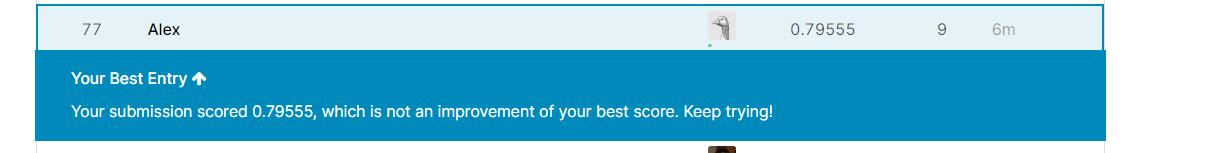

In [32]:
from IPython.display import Image
Image("kaggle.PNG")